# Unsupervised Learning Techniques

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Clustering

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from matplotlib.image import imread
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from utils.plots import plot_digits
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

### K-Means

In [3]:
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3],
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

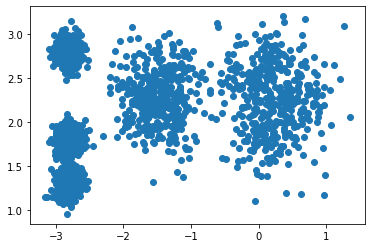

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Text(0.5, 1.0, 'predicted clusters')

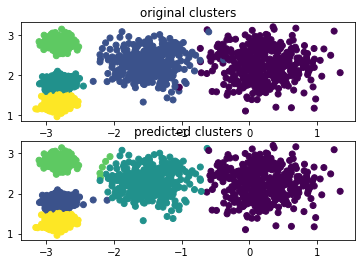

In [6]:
plt.subplot(211)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('original clusters')

plt.subplot(212)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('predicted clusters')

In [7]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [8]:
mean_squared_error(blob_centers, kmeans.cluster_centers_)

0.3964573226468091

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [10]:
kmeans.inertia_

211.59853725816828

In [11]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

### Using clustering for image segmentation

In [12]:
image = imread(os.path.join('images', 'ladybug.png'))
image.shape

(533, 800, 3)

(-0.5, 799.5, 532.5, -0.5)

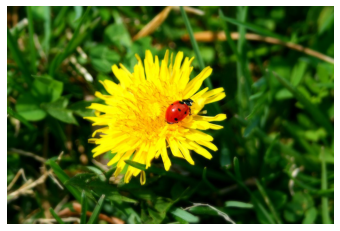

In [13]:
plt.imshow(image)
plt.axis('off')

In [14]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

(-0.5, 799.5, 532.5, -0.5)

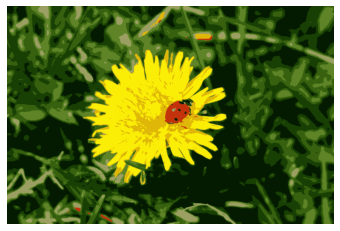

In [15]:
plt.imshow(segmented_img)
plt.axis('off')

### using Clustering for Preprocessing

In [16]:
X_digits, y_digits = load_digits(return_X_y=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [18]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr')

In [19]:
log_reg.score(X_test, y_test)

0.9688888888888889

In [20]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr'))])

In [21]:
pipeline.score(X_test, y_test)

0.9755555555555555

In [22]:
param_grid = dict(kmeans__n_clusters=range(2, 100, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=12; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=12; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=12; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=17; total time=   4.9s
[CV] END ..............................kmeans__n_clusters=17; total time=   5.7s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr'))]),
             param_grid={'kmeans__n_clusters': range(2, 100, 5)}, verbose=2)

In [23]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 67}
0.9822222222222222


### Using Clustering for Semi-Supervised learning

In [24]:
n_labeled = 50
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=5000, multi_class='ovr')

In [25]:
log_reg.score(X_test, y_test)

0.8222222222222222

In [26]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digits_idx]

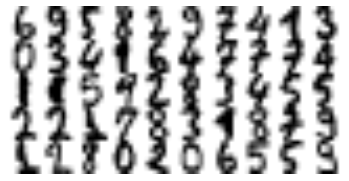

In [27]:
plot_digits(X_representative_digits, size=8, interpolation="bilinear")

In [28]:
y_representative_digits = y_train[representative_digits_idx]

In [29]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_representative_digits, y_representative_digits)

LogisticRegression(max_iter=5000, multi_class='ovr')

In [30]:
log_reg.score(X_test, y_test)

0.9

In [31]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [32]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr')

In [33]:
log_reg.score(X_test, y_test)

0.9

In [34]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [35]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr')

In [36]:
log_reg.score(X_test, y_test)

0.9222222222222223

In [37]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

1.0

### DBSCAN

In [38]:
X, y = make_moons(n_samples=1000, noise=0.05)

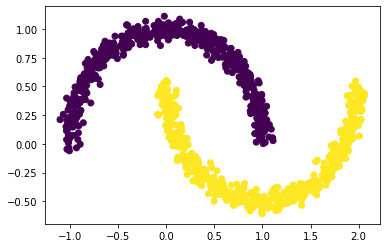

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [40]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [41]:
len(dbscan.core_sample_indices_)

1000

In [42]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [43]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[1 0 1 0]
[[0.12 0.88]
 [1.   0.  ]
 [0.24 0.76]
 [1.   0.  ]]
